# Clasificación de sistemas

$$x(t) \rightarrow y(t)$$

$$x[n] \rightarrow y[n]$$

$$x(t)  \rightarrow y[n]$$

$$S:y[n]=(2x[n]-x^2[n])^2$$

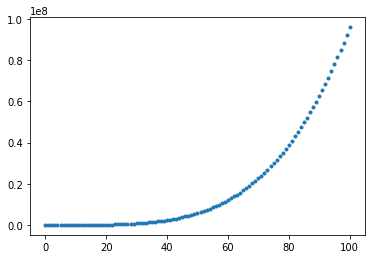

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def S(x):
    y = (2*x-x**2)**2
    return y

plt.plot(S(np.arange(0,101)),'.')

$$S:y[n]=y[n-1]+x[n]$$

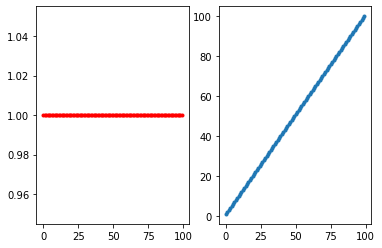

In [8]:
x = np.ones(100)

def S(x):
    y = np.zeros(len(x))
    y[0]=0+x[0]
    for n in range(1, len(x)):
        y[n]=y[n-1]+x[n]
    return y

y=S(x)
plt.subplot(1,2,1)
plt.plot(x,'.r')
plt.subplot(1,2,2)
plt.plot(y, '.')

$$S_1:y[n]=\sum_{k=0}^{n}x[k]$$

$$S_2 = S_1^{-1}$$

$$S_2:w[n]=y[n]-y[n-1]$$

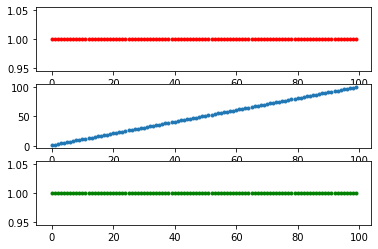

In [10]:
x = np.ones(100)

def S1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = np.sum(x[0:n+1])
    return y

def S2(y):
    w = np.zeros(len(y))
    w[0] = y[0]-0 # indice problematico y[-1]=0
    for n in range(1,len(y)):
        w[n] = y[n]-y[n-1]
    return w

y = S1(x)
w = S2(y)
plt.subplot(3,1,1)
plt.plot(x, '.r')
plt.subplot(3,1,2)
plt.plot(y, '.')
plt.subplot(3,1,3)
plt.plot(w, '.g')


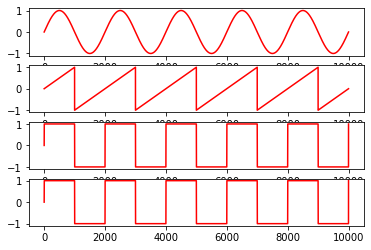

In [11]:
import scipy.signal as signal

T = 1000;
Fs = 10000;
t = np.linspace(0, T, Fs)
x1 = np.sin(2*np.pi*50*t);
x2 = signal.sawtooth(2*np.pi*50*t+np.pi);  # diente de sierra
y1 = np.sign(x1);  # funcion signo
y2 = np.sign(x2);

plt.subplot(4,1,1)
plt.plot(x1,'r')
plt.subplot(4,1,2)
plt.plot(x2,'r')
plt.subplot(4,1,3)
plt.plot(y1,'r')
plt.subplot(4,1,4)
plt.plot(y2,'r')

$$S_1:y[n]=\sum_{k=0}^{n}x[k]$$

$$S_2:y[n]=x[n]+x[n-2]$$

$$S_3:y[n]=7x[n-5]$$

![](../img/no_causales.jpg)


$$S_1:y[n]=x[n+1]$$

$$S_2:y[n]=x[n]+x[n+2]$$

$$S_3:y[n]=7x[n+5]$$

$$S_1:y[n]=sen[x[n]] \qquad \text{Verificar que es invariante en el tiempo.}$$

$$S_2:y[n]=nx[n] \qquad \text{Verificar que es variante en el tiempo.}$$

$$S_1:y[n]=nx[n]$$

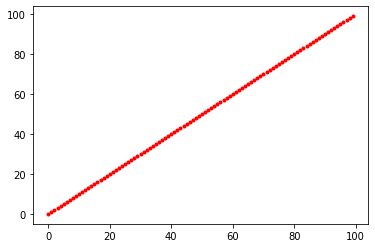

In [12]:
x = np.ones(100)

def S1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = n*x[n]
    return y

plt.plot(S1(x),'.r')

$$S_2:y[n]=e^{x[n]}$$

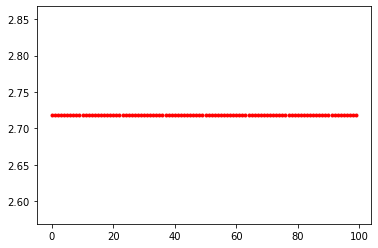

In [13]:
x = np.ones(100)

def S1(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = np.exp(x[n])
    return y

plt.plot(S1(x),'.r')

$$ ax_1[n] \rightarrow ay_1[n] \\ bx_2[n] \rightarrow by_2[n] \\ \text{Entonces: } x_3=ax_1[n]+bx_2[n]\rightarrow y_3=ay_1[n]+by_2[n] \\ $$

$$S_1:y[n]=nx[n]$$

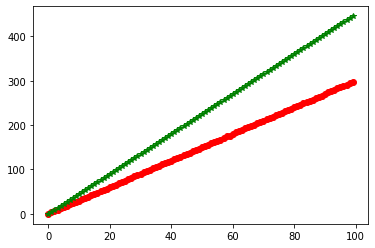

In [20]:
N = 100
alfa = 2 
beta = 0.5
    
x1 = np.arange(0,N)  # secuencia arbitraria n°1, para el estudio de la LINEALIDAD.
x2 = np.sin(2*np.pi*0.3*np.arange(0,N))  # secuencia arbitraria n°2, para el estudio de la LINEALIDAD.
x3 = alfa*x1 + beta*x2  # combinacion lineas de las secuencias n°1 y n°2, para el estudio de la LINEALIDAD.

y1,y2,y3 = np.zeros(len(x)),np.zeros(len(x)),np.zeros(len(x))

for n in range(len(x)):
    y1[n] = n+x1[n] # n+x[n]
    y2[n] = n+x2[n]
    y3[n] = n+x3[n]

plt.plot(y3,'ro')  
plt.plot(alfa*y1+beta*y2,'g*')

$$S1=y[n] = x[n]-2x[n-1]-y[n-2]$$

In [21]:
# Generamos 5 secuencia para estudiar el sistema
N = 100;
alfa = 2; beta = 0.5;
    
x1 = np.arange(0,N)  # secuencia arbitraria n°1, para el estudio de la LINEALIDAD.
x2 = np.sin(2*np.pi*0.3*np.arange(0,N))  # secuencia arbitraria n°2, para el estudio de la LINEALIDAD.
x3 = alfa*x1 + beta*x2  # combinacion lineas de las secuencias n°1 y n°2, para el estudio de la LINEALIDAD.

x4 = np.concatenate((np.ones(1), np.zeros(N-1))) # secuencia para estudiar la ESTABILIDAD.
x5 = np.concatenate((np.zeros(5), x1[1:N-4]))  # secuencia para estudiar la INVARIANZA TEMPORAL, retardando 5 muestras.

# Consideramos las siguientes condiciones iniciales n = 0 --> x [n-1]=x[-1]= 0 ; y[n-2]=y[-2]= 0.5 // n = 1 --> y[n-2]=y[-1] = 2
y_1 = 0; y_2 = 0; x_1 = 0;

# Ahora, debemos calcular las salidas para las entradas anteriores y1[n],y2[n], y3[n], y4[n], por ultimo y5[n]   

# Primero, determinamos fuera del bucle la salida para índices problemáticos n = 0 y n = 1

y1,y2,y3,y4,y5 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N)

# Para n = 0
n = 0
y1[n] = x1[0]-2*x_1-y_2
y2[n] = x2[0]-2*x_1-y_2
y3[n] = x3[0]-2*x_1-y_2
y4[n] = x4[0]-2*x_1-y_2
y5[n] = x5[0]-2*x_1-y_2

# Para n = 1
n = 1
y1[n] = x1[1]-2*x1[0]-y_1
y2[n] = x2[1]-2*x2[0]-y_1
y3[n] = x3[1]-2*x3[0]-y_1
y4[n] = x4[1]-2*x4[0]-y_1
y5[n] = x5[1]-2*x5[0]-y_1

# Realizamos los cálculos para n > 1
for n in range(2,N):
    y1[n] = x1[n]-2*x1[n-1]-y1[n-2]
    y2[n] = x2[n]-2*x2[n-1]-y2[n-2]
    y3[n] = x3[n]-2*x3[n-1]-y3[n-2]
    y4[n] = x4[n]-2*x4[n-1]-y4[n-2]
    y5[n] = x5[n]-2*x5[n-1]-y5[n-2]

<function matplotlib.pyplot.show(*args, **kw)>

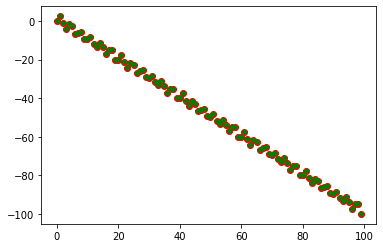

In [22]:
# Linealidad
plt.plot(y3,'ro')  
plt.plot(alfa*y1+beta*y2,'g*')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

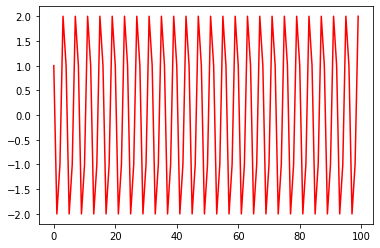

In [23]:
# Estabilidad
plt.plot(y4,'r')
plt.show

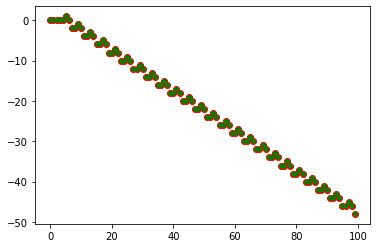

In [24]:
# Invarianza temporal
plt.plot(y5,'ro')
plt.plot(np.concatenate((np.zeros(5), y1[1:N-4])),'g*')